In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [3]:
train_generator = generator.flow_from_directory(
    'data/gender/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)
val_generator = generator.flow_from_directory(
    'data/gender/Validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [14]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
1470/1470 [==============================] - 342s 232ms/step - loss: 4.1148 - accuracy: 0.7031 - val_loss: 0.5018 - val_accuracy: 0.7778
Epoch 2/10
1470/1470 [==============================] - 199s 135ms/step - loss: 0.4676 - accuracy: 0.7881 - val_loss: 0.4294 - val_accuracy: 0.8108
Epoch 3/10
1470/1470 [==============================] - 196s 133ms/step - loss: 0.4368 - accuracy: 0.8064 - val_loss: 0.3983 - val_accuracy: 0.8328
Epoch 4/10
1470/1470 [==============================] - 197s 134ms/step - loss: 0.4097 - accuracy: 0.8220 - val_loss: 0.3933 - val_accuracy: 0.8391
Epoch 5/10
1470/1470 [==============================] - 198s 134ms/step - loss: 0.3752 - accuracy: 0.8430 - val_loss: 0.3113 - val_accuracy: 0.8728
Epoch 6/10
1470/1470 [==============================] - 198s 135ms/step - loss: 0.3409 - accuracy: 0.8602 - val_loss: 0.3283 - val_accuracy: 0.8641
Epoch 7/10
1470/1470 [==============================] - 175s 119ms/step - loss: 0.3394 - accuracy: 0.8595 - val_

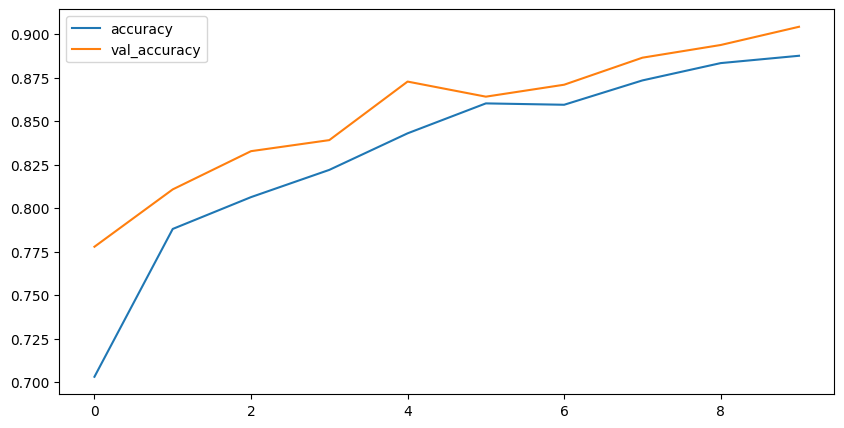

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()